# Lab4-TensorFlow

*Лабораторная работа №4: Обучению первой модели на TensorFlow для распознавания рукописных цифр на датасете MNIST*

## Шаг 1: Загрузка и предобработка данных

- Импортируйте необходимые библиотеки: tensorflow и tensorflow.keras.datasets.mnist

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import numpy as np
import ssl
from tensorflow.keras.datasets import mnist

2024-04-17 01:46:09.271497: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


- Загрузите датасет MNIST с помощью функции mnist.loaddata()

In [2]:
# Фикс ошибки с SSL сертификатами
ssl._create_default_https_context = ssl._create_unverified_context


# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

- Предобработайте данные: нормализуйте их, преобразуйте в нужный формат (например, масштабирование от 0 до 1)

In [3]:
# Предобработка данных
x_train, x_test = x_train / 255.0, x_test / 255.0

## Шаг 2: Создание нейронной сети

- Используйте модель Sequential из библиотеки tensorflow.keras.models
- Добавьте слои к модели: открытый слой Flatten с inputshape=(28, 28), полносвязанный слой Dense с 128 нейронами и функцией активации ReLU, полносвязанный слой Dense с 10 нейронами и функцией активации softmax

In [4]:
# Создание нейронной сети
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

/Users/artemkostylev/Library/Mobile Documents/com~apple~CloudDocs/PROJECTS/ВВИТ/Семестр 2/Lab4-TensorFlow/venv/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Шаг 3: Компиляция модели
- Компилируйте модель с оптимизатором 'adam', функцией потерь 'sparsecategoricalcrossentropy' и метрикой 'accuracy'

In [5]:
# Компиляция модели
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

## Шаг 4: Обучение модели
- Используйте метод fit для обучения модели на обучающем наборе данных с указанием числа эпох (например, 5 эпох)

In [6]:
# Обучение модели
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8773 - loss: 0.4311
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.1232
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9760 - loss: 0.0798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9820 - loss: 0.0586
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9871 - loss: 0.0436


## Шаг 5: Оценка качества модели
- Используйте метод evaluate для оценки качества модели на тестовом наборе данных

In [7]:
# Оценка качества модели
test_loss, test_accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 640us/step - accuracy: 0.9707 - loss: 0.0899


- Выведите точность модели на тестовом наборе данных

In [8]:
print(f'Точность модели на тестовом наборе данных: {test_accuracy}')

Точность модели на тестовом наборе данных: 0.9743000268936157


## Шаг 6: Анализ результатов
- Импортируйте библиотеку matplotlib.pyplot для построения графика

In [9]:
# Анализ результатов
import matplotlib.pyplot as plt

- Постройте график кривой обучения (accuracy) с помощью данных из истории обучения

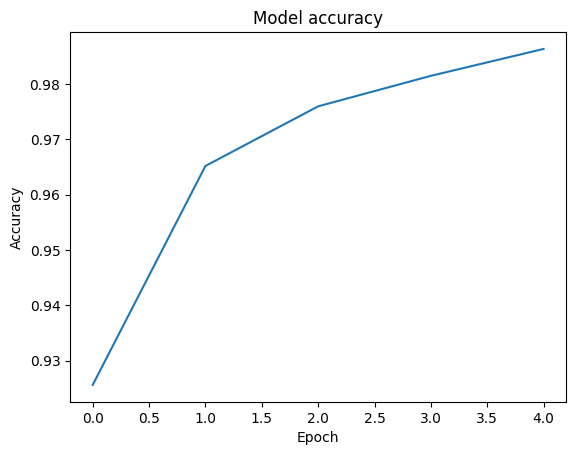

In [10]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

**Данный график показывает, как менялась точность модели на каждой эпохе обучения (по оси X - эпохи, по оси Y - точность)**